# Import Libraries

In [ ]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
import operator
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.ensemble import (
    VotingClassifier, 
    VotingRegressor
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import ( # type: ignore
    Input, 
    Dense, 
    Dropout, 
    BatchNormalization, 
    ReLU, 
    LeakyReLU, 
    PReLU, 
    Activation, 
    Conv2D, 
    Flatten,
    ELU,
    LSTM, 
    GRU
)
from tensorflow.keras.activations import swish # type: ignore
from tensorflow.keras.losses import ( # type: ignore
    MeanSquaredError, 
    MeanAbsoluteError, 
    Huber,
    BinaryCrossentropy, 
    Hinge, 
    CategoricalCrossentropy,
    SparseCategoricalCrossentropy
)
from tensorflow.keras.models import ( # type: ignore
    Model, 
    Sequential 
)
from tensorflow.keras.regularizers import ( # type: ignore
    l2, 
    l1
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore
from tensorflow.keras.optimizers import ( # type: ignore
    SGD, 
    Adagrad, 
    RMSprop, 
    Adam, 
    Adadelta, 
    Adamax, 
    Nadam
)
from tensorflow.keras.initializers import ( # type: ignore
    GlorotUniform, 
    HeNormal
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import tf2onnx

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [106]:
from DL_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    get_columns_with_2_unique_values,
    analyze_null_columns,
    check_balance_classification,
    rate_by_group,
    over_under_sampling_classification,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TT,
    get_x_y_TVT,
    validate_test_data_categorical_columns,
    get_x_y_TT_shape,
    get_x_y_TVT_shape,
    scale_data,
    get_cross_validator,
    get_hidden_layer_activation,
    get_output_layer_activation,
    get_optimizer,
    get_loss,
    get_x_y,
    plot_feature_importance,
    plots_evaluate_models,
)

# call_visualization_def

In [107]:
from DL_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [108]:
df = read_data(r'Churn_Modelling.csv')
true_original_df = copy.deepcopy(df)
print(df.shape)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Churn_Modelling.csv
(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
target_column = 'Exited'

In [110]:
# Make the target is last column
df = target_last_col(df,target_column)

# Get Information of Data

In [111]:
df_columns = df.columns.to_list()
print(df_columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [112]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,RowNumber,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",10000,10000,0
1,CustomerId,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000,10000,0
2,Surname,object,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...",2932,10000,0
3,CreditScore,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460,10000,0
4,Geography,object,"[France, Spain, Germany]",3,10000,0
5,Gender,object,"[Female, Male]",2,10000,0
6,Age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",70,10000,0
7,Tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11,10000,0
8,Balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382,10000,0
9,NumOfProducts,int64,"[1, 3, 2, 4]",4,10000,0


# drop not useful columns

#### list of columns

In [113]:
not_useful_columns_name = ['Gender', 'Geography', 'RowNumber', 'CustomerId', 'Surname']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [114]:
# not_useful_columns(df=df, column_name='')

# change the dtype of the column from object to numeric

#### list of columns

In [115]:
# convert_to_numeric_columns_name = ['']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [116]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [117]:
original_df = copy.deepcopy(df)
original_df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


# Describe numerical column and his information

In [118]:
Describe_numerical_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(Describe_numerical_column)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [119]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Describe object column and his information

In [120]:
Describe_object_column =df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(Describe_object_column)

[]


In [121]:
# df.describe(include=['object'])

# Data Encoding columns with 2 unique values

In [122]:
get_columns_with_2_unique_values(df)

In [123]:
# columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
# df = encode_column(df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [124]:
# columns = ['Gender']
# df = encode_column(df, columns = columns, method='binary', binary_1='Known', binary_0='Unknown')

In [125]:
# if the target column not binary
# columns = [target_column]
# true_original_df = encode_column(true_original_df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [126]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


# check columns have nulls

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB


In [128]:
null_columns = analyze_null_columns(df)
null_columns

The columns dtype is object: []
The columns dtype is numerical: []


,Column,Null Count,Type


## Identify columns with missing values

In [129]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [130]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [131]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [132]:
# remove_missing_rows(df=df)

## check columns with missing values

In [133]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [134]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [135]:
# fill_missing_columns = ['', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [136]:
# df = fill_missing_values_column(df, columns='Total Charges', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [137]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [138]:
outliers_df = check_outliers(df)

CreditScore           0
Age                   0
Tenure                0
Balance            6383
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary    9914
Exited                0
dtype: int64


## check outliers (plots)

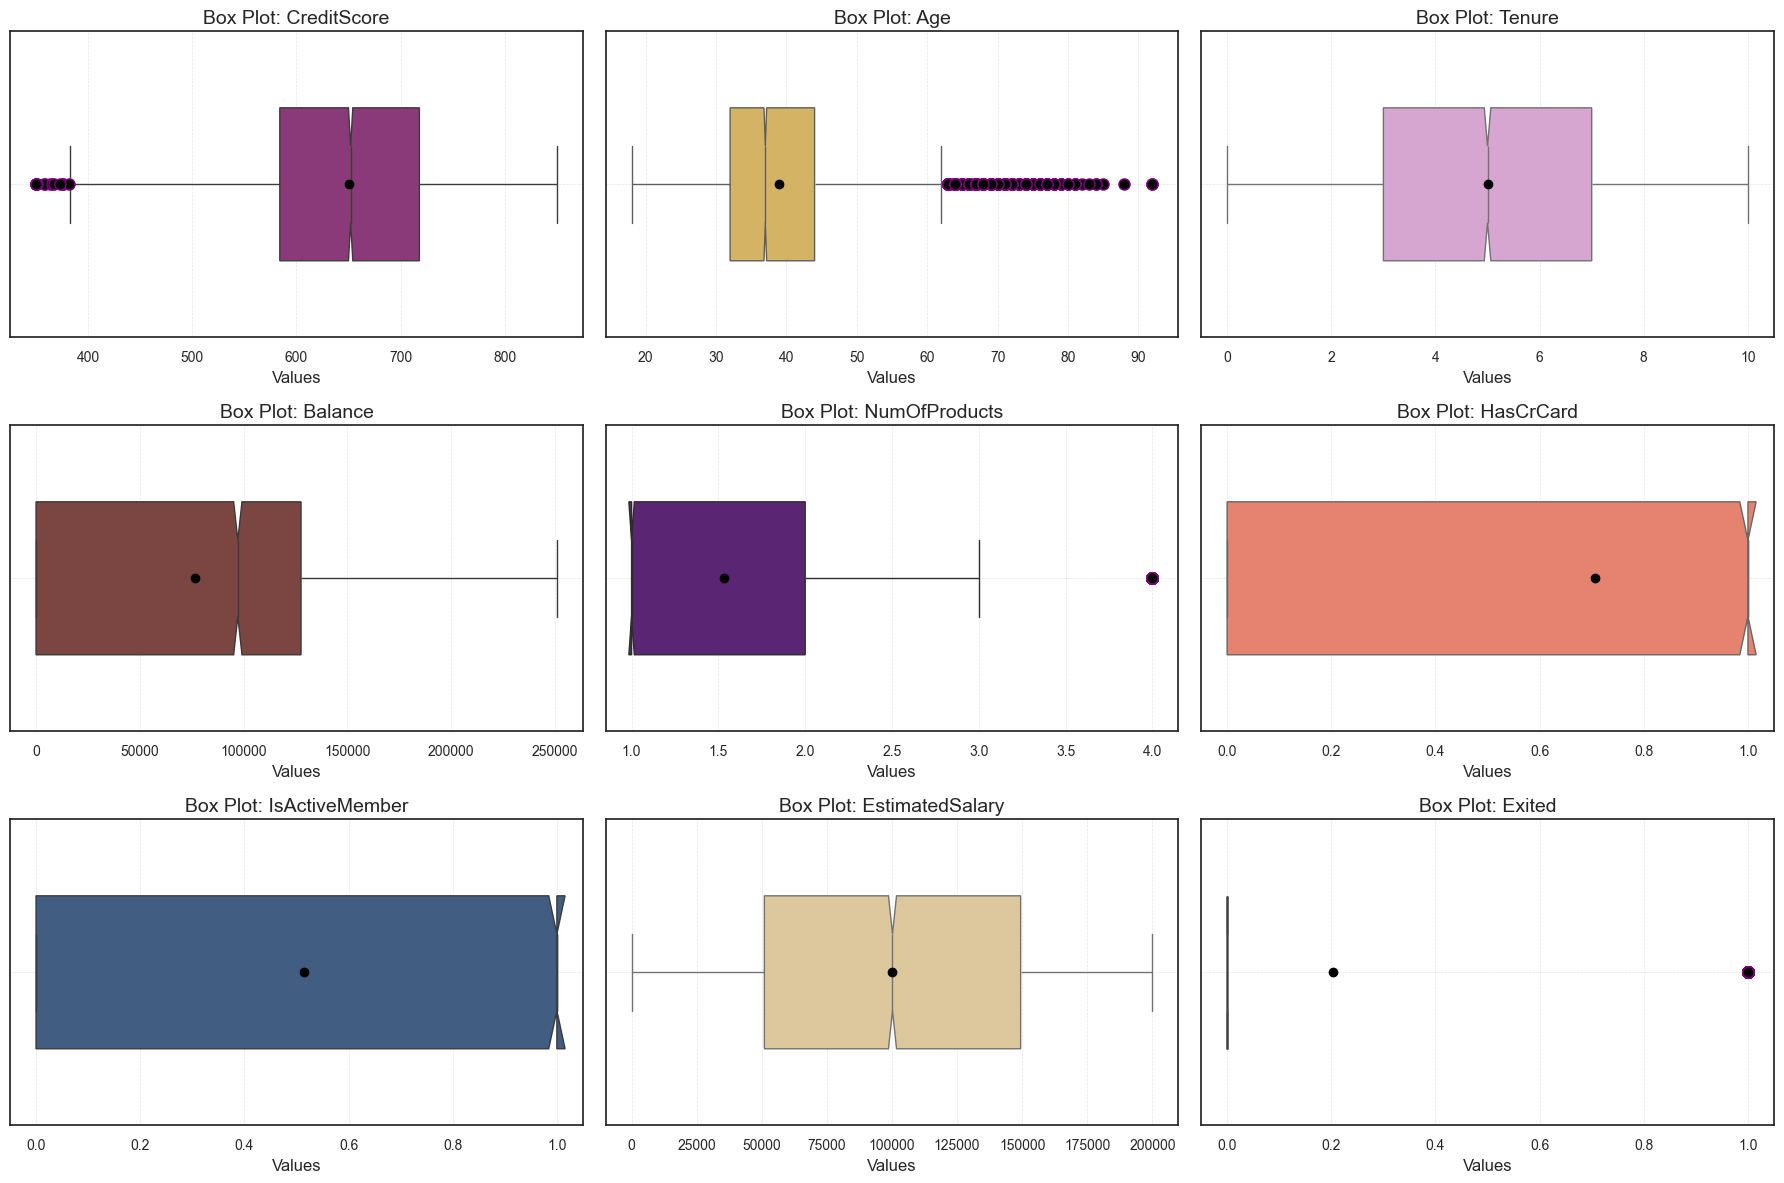

In [139]:
box_plot_all_columns(original_df, subplot_row = 3, figsize=(18, 12))

# Check the unbalance data

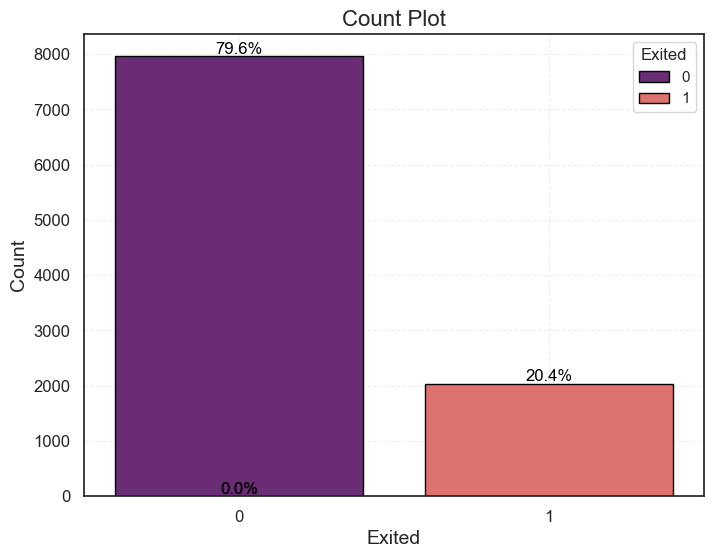

,count
name,
0,7963
1,2037


In [140]:
check_balance_classification(df,column_plot=target_column)

# Visualization

## info from the data

In [141]:
# age_Exited_rates = rate_by_group(true_original_df, 'MaritalStatus', 'Churn', 'CustomerID', positive_class=1, threshold=4)

In [142]:
# NumOfProducts_Exited_rates = rate_by_group(true_original_df, 'PrizmCode', 'Churn', 'CustomerID', positive_class=1)

In [143]:
# Geography_Exited_rates = rate_by_group(true_original_df, 'CreditRating', 'Churn', 'CustomerID', positive_class=1)

In [144]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionOffersAccepted', 'Churn', 'CustomerID', positive_class=1, threshold=5)

In [145]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionCalls', 'Churn', 'CustomerID', positive_class=1, threshold=5)
# Tenure_Exited_rates

## chart

In [146]:
# PaymentMethod_name = df['PrizmCode'].value_counts().index.to_list()
# PaymentMethod_values = df['PrizmCode'].value_counts().values.tolist()
# # pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
# pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Prizm Code")


In [147]:
# InternetService_name = df['MaritalStatus'].value_counts().index.to_list()
# InternetService_values = df['MaritalStatus'].value_counts().values.tolist()
# # pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
# pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Marital Status")

In [148]:
# Contract_name = original_df['CreditRating'].value_counts().index.to_list()
# Contract_values = original_df['CreditRating'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Credit Rating")

In [149]:
# Contract_name = original_df['RetentionCalls'].value_counts().index.to_list()
# Contract_values = original_df['RetentionCalls'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Retention Calls")

## Multiple bar

HasCreditCard
RetentionCalls
CreditRating

In [150]:
# grouped_data = original_df.groupby(['HasCreditCard', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='HasCreditCard by Churn Status', xlabel='HasCreditCard Type', ylabel='Count')

In [151]:
# grouped_data = original_df.groupby(['RetentionCalls', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='RetentionCalls by Churn Status', xlabel='RetentionCalls Type', ylabel='Count')

In [152]:
# grouped_data = original_df.groupby(['CreditRating', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by Churn Status', xlabel='CreditRating Type', ylabel='Count')

In [153]:
# grouped_data = original_df.groupby(['CreditRating', 'HasCreditCard']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ["Hasn't Credit Card","Has Credit Card"]

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by HasCreditCard Status', xlabel='CreditRating', ylabel='Count')

In [154]:
# grouped_data = original_df.groupby(['RetentionCalls', 'PrizmCode']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['Other', 'Rural','Suburban', 'Town']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='NumOfProducts by PrizmCode Status', xlabel='NumOfProducts', ylabel='Count')

## Bar

In [155]:
# column_counts = original_df['ThreewayCalls'].value_counts().reset_index()
# column_counts.columns = ['ThreewayCalls', 'value']

# bar_plot_plotly(df=column_counts, x='ThreewayCalls', y='value', hue='value')

In [156]:
# column_counts = original_df['HasCreditCard'].value_counts().reset_index()
# column_counts.columns = ['HasCreditCard', 'value']

# bar_plot_seaborn(df=column_counts, x='HasCreditCard', y='value',palette='viridis')

In [157]:
# column_counts = original_df['RetentionCalls'].value_counts().reset_index()
# column_counts.columns = ['RetentionCalls', 'value']

# bar_plot_matplotlib(column_counts['RetentionCalls'], column_counts['value'],x_rotation=0)

## count plot

In [158]:
# count_plot(df=original_df , x='RetentionOffersAccepted' , hue='Churn')

In [159]:
# categorical_features=original_df.drop(['ServiceArea'],axis=1).select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

In [160]:
# violin_plot(data=original_df, x='TruckOwner', y='MonthlyRevenue', hue='TruckOwner',split=True) #catagorical column in x and numircal in y

In [161]:
# violin_plot(data=original_df, x='HasCreditCard', y='PercChangeRevenues', hue='HasCreditCard') #catagorical column in x and numircal in y

In [162]:
# plot_violin_all_column(df, figsize=(30, 30), n_cols=6)

## Histogram

In [163]:
# plot_single_histogram_seaborn(original_df,x='MonthsInService', bins=50, palette='magma', show=False)
# plt.axvline(np.mean(original_df["MonthsInService"]) , color = "black" , label ="The Mean of the tenure")
# plt.axvline(np.median(original_df["MonthsInService"]) , color = "blue" , label ="The Median of the tenure")
# plt.show()

In [164]:
# plot_histograms(original_df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (30, 30))

#  Groupby and pivot

### Groupby

In [165]:
# grouped_df = df.groupby('')

### pivot

In [166]:
# pivot_df = df.pivot_table(values='values', index='category', columns='sub_category', aggfunc='mean')

# Correlation Coefficient

## Calculate Correlation

In [167]:
calculate_correlation(df, outcome_column=target_column,num_results=7)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 7 results:
          Variable  Pearson Coefficient        P-Value
1              Age             0.285323  1.239931e-186
6   IsActiveMember            -0.156128   1.348269e-55
3          Balance             0.118533   1.275563e-32
4    NumOfProducts            -0.047820   1.717333e-06
0      CreditScore            -0.027094   6.738214e-03
2           Tenure            -0.014001   1.615268e-01
7  EstimatedSalary             0.012097   2.264404e-01

Age
The Pearson Correlation Coefficient for Age is 0.2853 with a P-value of P = 1.24e-186

IsActiveMember
The Pearson Correlation Coefficient for IsActiveMember is -0.1561 with a P-value of P = 1.348e-55

Balance
The Pearson Correlation Coefficient for Balance is 0.1185 with a P-value of P = 1.276e-32

NumOfProducts
The Pearson Correlation Coefficient for NumOfProducts is -0.0478 with a P-value of P = 1.717e-06

CreditScore
The Pe

,Variable,Pearson Coefficient,P-Value
1,Age,0.285323,1.239931e-186
6,IsActiveMember,-0.156128,1.348269e-55
3,Balance,0.118533,1.275563e-32
4,NumOfProducts,-0.047820,1.717333e-06
0,CreditScore,-0.027094,6.738214e-03
2,Tenure,-0.014001,1.615268e-01
7,EstimatedSalary,0.012097,2.264404e-01


## Visualize Correlation with Bars

In [168]:
# df_corr = df.corr()[target_column].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

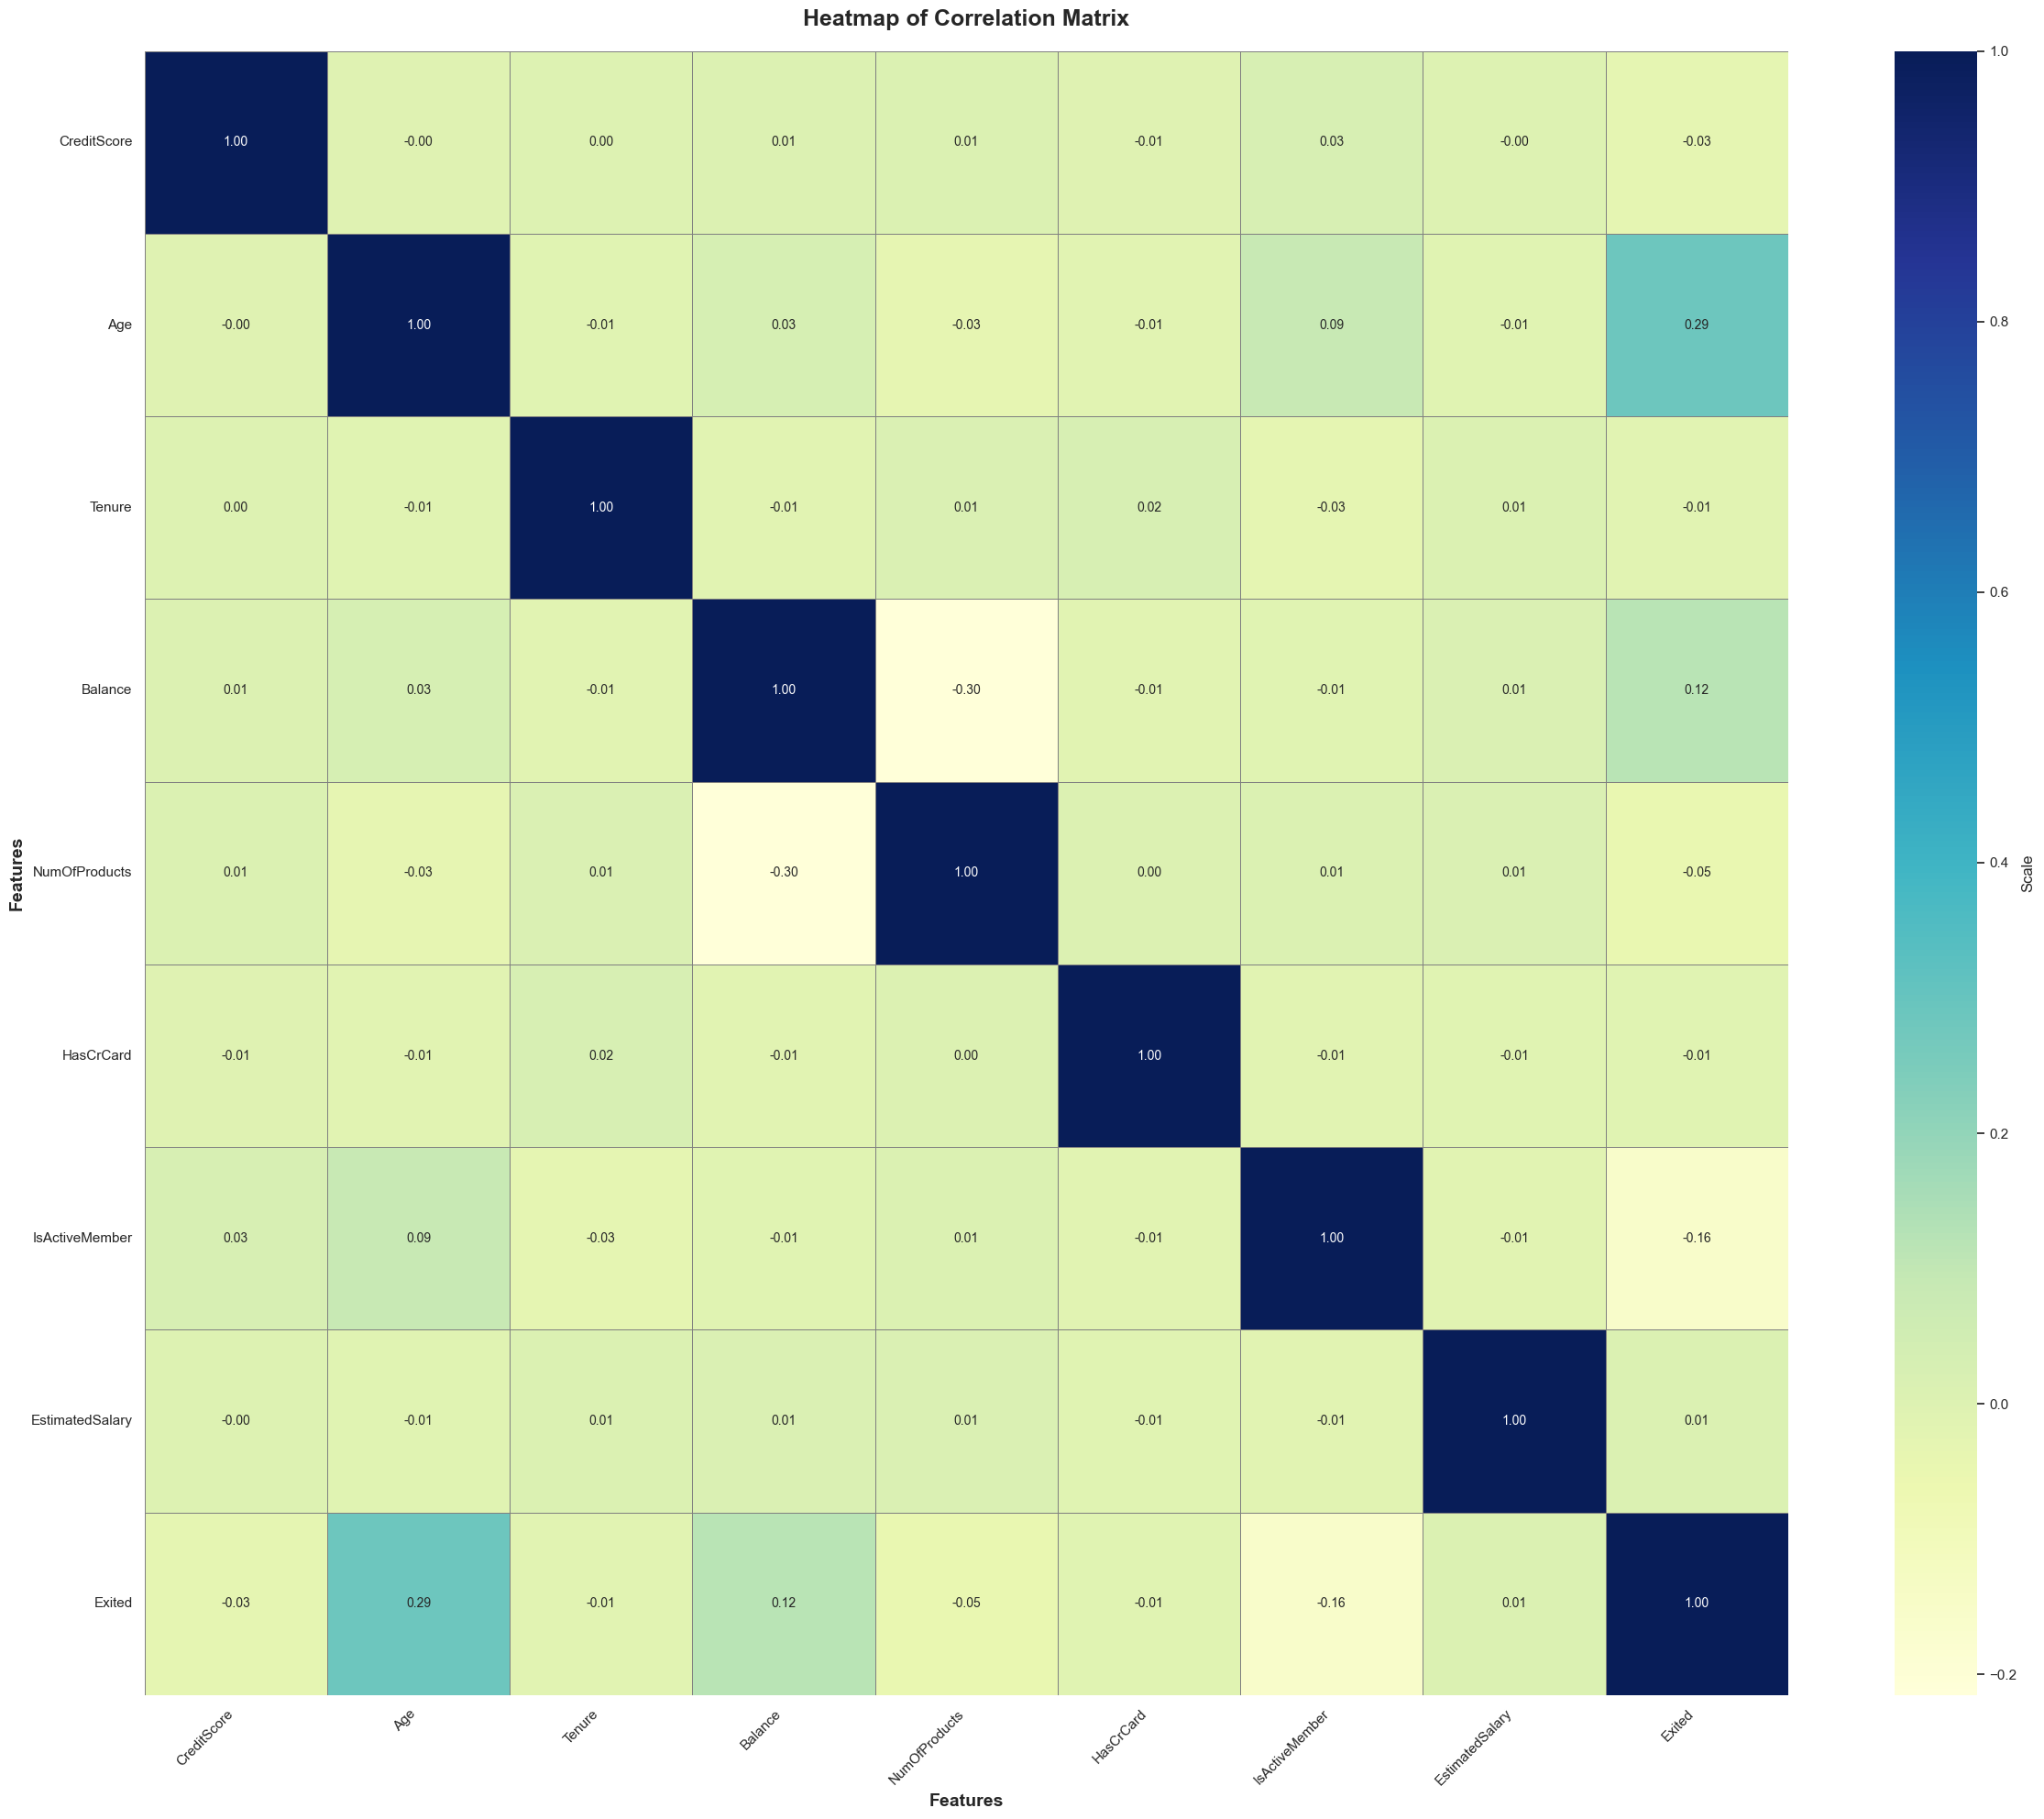

In [169]:
correlations = Heatmap_Correlation(df, mask=-1, cmap="YlGnBu", save_path=None, annot_size = 10, figsize=(25, 20))

# Data Encoding

In [170]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [171]:
# ordinal_categories = df[''].value_counts().index.to_list()
# ordinal_categories

In [172]:
# columns = []

# df = encode_column(df, columns = columns, method='get_dummies')

# df = encode_column(df, columns = 'City', method= 'label')
# df['City'] = df['City'].astype(float)

# ordinal_categories = df['CreditRating'].value_counts().index.to_list()
# df = encode_column(df, columns = 'CreditRating', method= 'ordinal', ordinal_categories=['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest'])

# df = encode_column(df, columns = '', method='target',target="")

# df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [173]:
len(df.columns)

9

## Make the target is last column

In [174]:
df = target_last_col(df, target_column)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


# Repair unbalanced data by using oversampling and undersampling.

In [175]:
# x, y = get_x_y(df, target_column)

In [176]:
# Counter(df[target_column])

In [177]:
# df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.5, n_jobs=-1)

### Check the unbalance data after repair 

In [178]:
# check_balance_classification(df,column_plot=target_column)

# Get X , Y (TT)

In [179]:
x_train, y_train, x_test, y_test = get_x_y_TT(df, target=target_column, test_size=0.2, stratify=True, shuffle=True, random_state=42)

In [180]:
get_x_y_TT_shape(x_train, y_train, x_test, y_test)

x_train shape = (8000, 8)
x_test shape = (2000, 8)
y_train shape = (8000,)
y_test shape = (2000,)


# Get X , Y (TVT)

In [181]:
# x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target=target_column, test_size=0.2, valid_size=0.12, stratify=True, shuffle=True, random_state=42)

In [182]:
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

# Get train, valid and test data in same time

In [183]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

## TT

In [184]:
x_train, x_test = scale_data(x_train = x_train, x_test = x_test)

## TVT

In [185]:
# x_train, x_valid, x_test = scale_data(x_train = x_train, x_test = x_test, x_valid = x_valid)

# Train

In [186]:
type_cross_valid = get_cross_validator(cv_type='KFold', cv=5)

## information for DL train

In [187]:
# To reduce the Overfitting can use 
## 1- kernel_regularizer=l2(0.01) but it decreases the accuracy
## 2- train the model many times by use Cross-Validation
## 3- EarlyStopping
## 4- Dropout
## 5- Batch Normalization
## 6- Weight Sharing Conv2D() use with image

In [188]:
# Hidden layer Activation Function
## 1- 'sigmoid'
## 2- 'tanh'
## 3- 'relu'
## 4- model.add(LeakyReLU(alpha=0.1))
## 5- model.add(PReLU())
## 6- 'elu' Or model.add(ELU(alpha=1.0))
## 7- swish Or def swish(x): 
#                  return x * tf.nn.sigmoid(x) 
#              model.add(Activation(swish))

In [189]:
# output layer Activation Function and Cost Functions

## a) Regression
### 1- In AF no Activation Function or 'linear' with CF 'mean_squared_error'
### 2- In AF 'tanh' with CF 'mean_absolute_error'
### 3- In AF 'relu' with CF Huber()

## b) Binary Classification
### 1- In AF 'sigmoid' with CF 'binary_crossentropy'
### 2- In AF 'sigmoid' with CF 'hinge'

## c) Multi-Class Classification
### 1- In AF 'softmax' with CF 'categorical_crossentropy'
### 2- In AF 'softmax' with CF 'sparse_categorical_crossentropy'

## Models

In [190]:
print(x_train.shape)

(8000, 8)


In [ ]:
# get_hidden_activation
hidden_activation = get_hidden_layer_activation(activation_type='relu')

# get_output_activation
output_activation = get_output_layer_activation(activation_type='sigmoid')

### Functional Model

In [191]:
# # Define the input layer
# input_layer = Input(shape=(x_train.shape[1],))

# # First Dense layer
# x = Dense(units=10, activation='relu')(input_layer)
# # x = BatchNormalization()(x)
# # x = Dropout(0.3)(x)

# # Second Dense layer
# x = Dense(units=10, activation='relu')(x)
# # x = BatchNormalization()(x)
# # x = Dropout(0.3)(x)

# # # Third Dense layer
# # x = Dense(units=10, activation='relu')(x)
# # x = BatchNormalization()(x)
# # x = Dropout(0.5)(x)

# # Output layer
# output_layer = Dense(units=1, activation='sigmoid')(x)

# # Create the model
# model = Model(inputs=input_layer, outputs=output_layer)

### Sequential Model first way

In [192]:
model = Sequential()

# # First Dense layer
model.add(Dense(units=10, activation='relu', input_dim=x_train.shape[1])) # or ,input_shape=(x_train.shape[1],)
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# # Second Dense layer
model.add(Dense(units=10, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# # Third Dense layer
# model.add(Dense(units=10, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Output layer
model.add(Dense(units=1, activation='sigmoid'))

### Sequential Model second way

In [193]:
# model = Sequential([
    
#     # # First Dense layer
#     Dense(units=10, activation='relu', input_dim=x_train.shape[1]), # or ,input_shape=(x_train.shape[1],)
#     # BatchNormalization(),
#     # Dropout(0.3),
    
#     # # Second Dense layer
#     Dense(units=10, activation='relu'),
#     # BatchNormalization(),
#     # Dropout(0.3),
    
#     # # Third Dense layer
#     # Dense(units=10, activation='relu'),
#     # BatchNormalization(),
#     # Dropout(0.5),
    
#     # # Output layer
#     Dense(units=1, activation='sigmoid')
# ])

## Train the Model

In [194]:
# get_optimizer
optimizer = get_optimizer(op_type='Adam', learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# get_loss
loss = get_loss(loss_type='binary_crossentropy', from_logits=False, label_smoothing=0, reduction='sum_over_batch_size')

In [195]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Create the EarlyStopping callback to stop training if no improvement
early_stopping = EarlyStopping(
    monitor='val_loss',  # Track validation loss
    mode='min',  # Stop when the validation loss is not decreasing
    patience=5,  # Number of epochs to wait before stopping if no improvement
    restore_best_weights=True  # Restore the weights of the best epoch after stopping
)

# Define the file path to save the best weights
checkpoint_filepath = 'model_best_weights.weights.h5'

# Create the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,  # Save only the model's weights
    monitor='val_loss',  # Track validation loss
    mode='min',  # Save the model when the validation loss is minimized
    save_best_only=True  # Only save the best model
)

# # To load the saved best weights later (if needed)
# model.load_weights(checkpoint_filepath)

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, callbacks=[early_stopping, checkpoint], verbose=1, batch_size=32, epochs=100) # if split the data train, test, valid use validation_data=(x_valid,y_valid)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3433 - loss: 0.8814 - val_accuracy: 0.8000 - val_loss: 0.5212
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8021 - loss: 0.4942 - val_accuracy: 0.8000 - val_loss: 0.4508
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8027 - loss: 0.4433 - val_accuracy: 0.8238 - val_loss: 0.4214
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8279 - loss: 0.4133 - val_accuracy: 0.8406 - val_loss: 0.4024
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8362 - loss: 0.4058 - val_accuracy: 0.8519 - val_loss: 0.3866
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8378 - loss: 0.3948 - val_accuracy: 0.8550 - val_loss: 0.3760
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8447 - loss: 0.3740 - val_accuracy: 0.8562 - val_loss: 0.3674
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8538 - loss: 0.3576 

In [198]:
# Retrieve the epoch with the best validation loss
best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

# Display the metrics for the best epoch
best_metrics = {
    'accuracy': history.history['accuracy'][best_epoch-1],
    'loss': history.history['loss'][best_epoch-1],
    'val_accuracy': history.history['val_accuracy'][best_epoch-1],
    'val_loss': history.history['val_loss'][best_epoch-1]
}

In [199]:
print(f'Best epoch: {best_epoch}')
print(f"Metrics at best epoch:")
print(f"accuracy: {best_metrics['accuracy']:.5f}")
print(f"loss: {best_metrics['loss']:.5f}")
print(f"val_accuracy: {best_metrics['val_accuracy']:.5f}")
print(f"val_loss: {best_metrics['val_loss']:.5f}")

Best epoch: 56
Metrics at best epoch:
accuracy: 0.85688
loss: 0.34776
val_accuracy: 0.86187
val_loss: 0.33742


## Ensemble Methods

In [200]:
# # Assuming model1 and model2 are two pre-trained models
# model = VotingClassifier(estimators=[
#     ('model1', model1),
#     ('model2', model2)
# ], voting='soft')

# model.fit(x_train, y_train)

# Evaluation

In [201]:
loss, accuracy = model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8665 - loss: 0.3364


In [202]:
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: 0.3540, Test Accuracy: 0.8570


# prediction

In [203]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [204]:
y_pred = [1 if i >=.5 else 0 for i in y_pred]

# Accuracy score

In [205]:
accuracy_score(y_test, y_pred)

0.857

# Check Overfitting

## Training and Validation accuracy

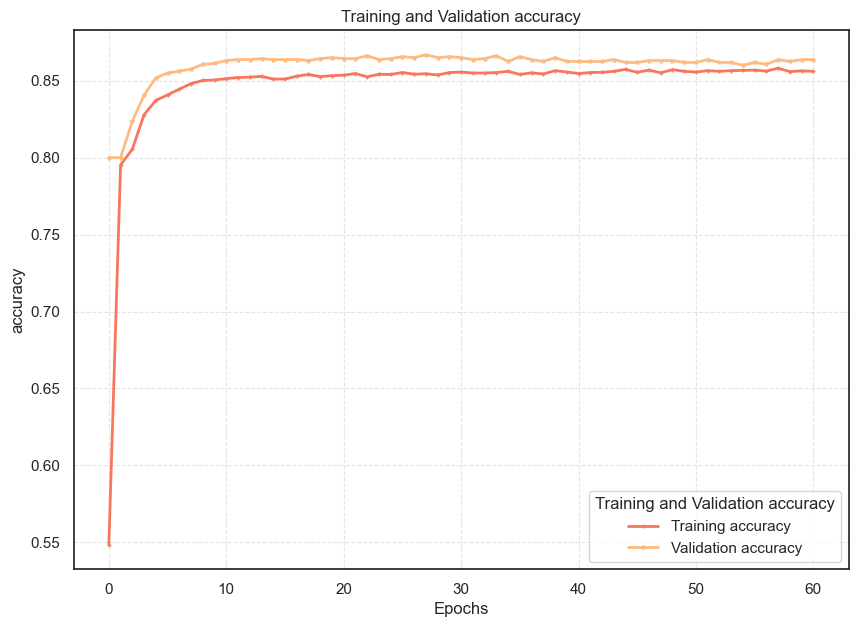

In [206]:
plot_line_matplotlib([history.history["accuracy"], history.history["val_accuracy"]],
                    labels=['Training accuracy', 'Validation accuracy'],
                    num_of_line=2, 
                    linewidths=2,
                    markers = True,
                    markersize=3,
                    linestyles = False,
                    title='Training and Validation accuracy', 
                    xlabel='Epochs', 
                    ylabel='accuracy')

## Training and Validation loss

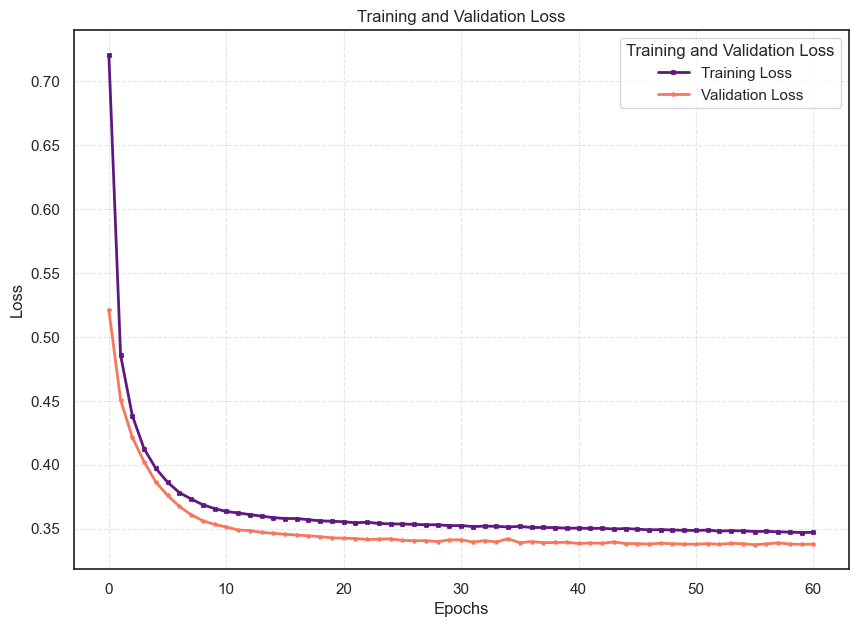

In [207]:
plot_line_matplotlib([history.history["loss"], history.history["val_loss"]],
                    labels=['Training Loss', 'Validation Loss'],
                    num_of_line=2, 
                    linewidths=2,
                    markers = True,
                    markersize=3,
                    linestyles = False,
                    title='Training and Validation Loss', 
                    xlabel='Epochs', 
                    ylabel='Loss')

# save the model

### a. SavedModel Format

In [ ]:
# Save the model
model.save('saved_model/my_model')

#### To load the model

In [ ]:
# loaded_model = tf.keras.models.load_model('saved_model/my_model')

### b. HDF5 Format

In [ ]:
# # Save the model as an HDF5 file
# model.save('my_model.h5')

#### To load the model

In [ ]:
# # Load the model
# loaded_model = tf.keras.models.load_model('my_model.h5')

### TensorFlow to ONNX

In [ ]:
# # Convert and save
# model_proto, _ = tf2onnx.convert.from_keras(model, output_path="model.onnx")